# Random Forest Regression with Scikit Learn

This tutorial is here to show you how to run an out-of-the-box Random Forest regression with Scikit Learn.

By: Ellianna S. Abrahams

In [1]:
# the greatest trio that ever was
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# we are working with random forest regression from scikit learn

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Preprocess the Data

We are going to use data from the Gaia 100 pc sample to predict temperatures. All values of this table from Gaia DR2. In machine learning, preprocessing the data is an important step. This data has been pre-selected using the flag recipes recommended by the Gaia Collaboration.

In [29]:
gaia_df = pd.read_csv('100pc_teff_sample.csv')

In [30]:
gaia_df.columns

Index(['source_id', 'parallax', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'teff_val'],
      dtype='object')

In [48]:
n_features = len(gaia_df.columns) - 1

In [31]:
len(gaia_df)

100000

We want to predict temperature as a function of the rest of the variables. We want to remove temperature from our dataset, since that is what we are predicting.

Keep in mind that random forest out-of-the-box like the one scikit learn provides don't take uncertainty on any of the into account. 

In [32]:
X = gaia_df[['parallax', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']]

In [33]:
y = gaia_df['teff_val']

Now we split our data into training and test data. I recommend using scikit learn to split the training data because it splits the data randomly and removes any unknown biases that might come from an ordered training set. There are different recommendation for the size of your train and test set. I generally use 20% of the original dataset for testing.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training your Random Forest

![](http://www.saedsayad.com/images/Decision_tree_r1.png)

In [35]:
#Initialize your model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, max_features = sqrt(n_features), random_state = 42)

In [36]:
#Train your model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Let's look at the feature importance. In our trained model. Is it logical how the RF is weighting each feature?

In [37]:
#Extract the feature importances from the random forest
features = [t.feature_importances_ for t in rf.estimators_]

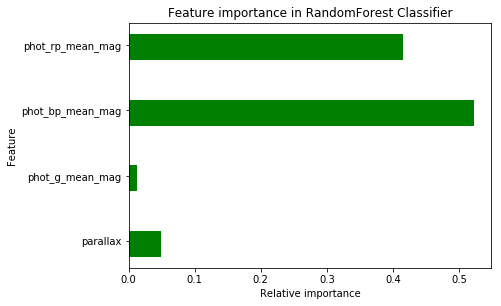

In [39]:
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(features[0])) # the x locations for the groups
ax.barh(ind, features[0], width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train.columns, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

## Testing your Random Forest

In [40]:
#Predict temperatures for our test set

y_pred = rf.predict(X_test)

Let's see how our predictions performed.

Text(0,0.5,'Predictied T_eff Value (K)')

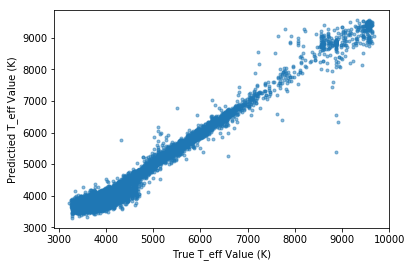

In [45]:
plt.scatter(y_test, y_pred, marker='.', alpha=0.5)
plt.xlabel('True T_eff Value (K)')
plt.ylabel('Predictied T_eff Value (K)')

Random forest also doesn't output uncertainty, but we can use the loss between our `y_test` and `y_true` to measure the average error. We'll calculate mean absolute error as an example.

In [41]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)

In [42]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 114.38 degrees.


Text(0,0.5,'Predictied T_eff Value (K)')

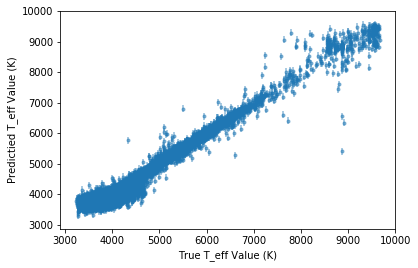

In [47]:
plt.errorbar(y_test, y_pred, yerr=np.mean(errors), fmt='.', alpha=0.5)
plt.xlabel('True T_eff Value (K)')
plt.ylabel('Predictied T_eff Value (K)')